# Zad 3
Bierzemy nasze irysy i po podziale na zbiór treningowy i testowy (train and test) trenujemy nasz algorytm, po czym sprawdzamy go na zbiorze testowym.

|--- feature_2 <= 2.60
|   |--- class: setosa
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: versicolor
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: versicolor
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



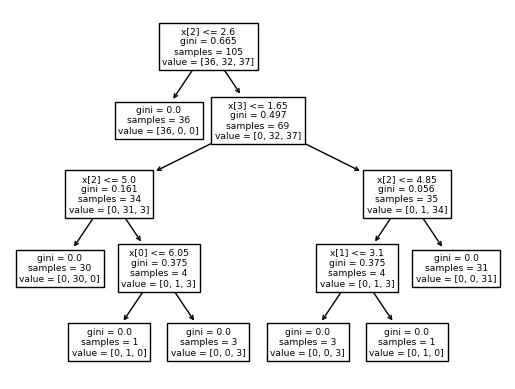

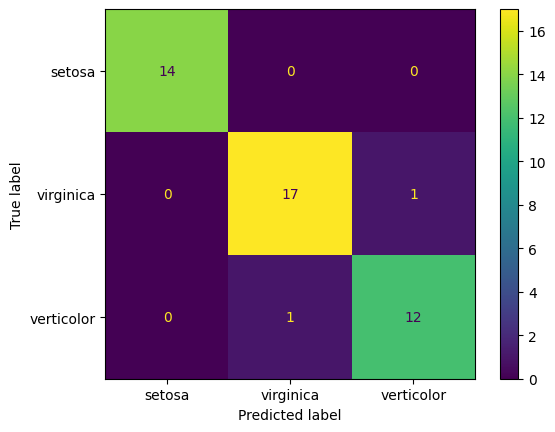

0.9555555555555556


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pd.read_csv("iris.csv")

all_inputs = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
all_classes = df['species'].values

(train_set, test_set, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)

# print(train_set)
# print(test_set)
# print(train_classes)
# print(test_classes)

dtc = DecisionTreeClassifier()
dtc.fit(train_set, train_classes)

extree = tree.export_text(dtc)
print(extree)
plotree = tree.plot_tree(dtc)

pred = dtc.predict(test_set)
confmtx = confusion_matrix(test_classes, pred)
plot = ConfusionMatrixDisplay(confusion_matrix=confmtx, display_labels=["setosa", "virginica", "verticolor"])

plot.plot()
plt.show()

print(dtc.score(test_set, test_classes))

Nasz output to kolejno:

1. Nasze drzewo w formie tekstowej
2. Nasze drzewo w formie graficznej
3. Macierz niepewności
4. Procent poprawnych odpowiedzi

Jak widać jest to całkiem skuteczna metoda, osiągająca (dla naszego podziału) ponad 95% poprawności.